<a href="https://colab.research.google.com/github/obeabi/ProjectPortfolio/blob/master/AirFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airfoil Self-Noise Data Set
## Written by: Abiola Obembe
### Date : 2020-09-17
#### Objective: Predict Scaled sound pressure level, in decibels given the following attributes:
#### 1. Frequency, in Hertzs.
#### 2. Angle of attack, in degrees.
#### 3. Chord length, in meters.
#### 4. Free-stream velocity, in meters per second.
#### 5. Suction side displacement thickness, in meters.

## Import libraries

In [1]:
# import required depednecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print("Installtion completed successfully!")


Installtion completed successfully!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preprocessing

In [5]:
# load dataset and include column headers
dataset = pd.read_csv('airfoil_self_noise.csv',header= None)
cols = ['Frequency','AngleAttack','ChordLength','Velocity','Thickness','SoundPressure']

dataset.columns = cols
dataset.head()

,Frequency,AngleAttack,ChordLength,Velocity,Thickness,SoundPressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [8]:
# Check shape of dataset and missing values
print("The shape of the dataset is:", (dataset.shape))
print("The number of rows in the dataset is:", str(dataset.shape[0]))
print("The number of columns in the dataset is:", str(dataset.shape[1]))

missing_values = dataset.isnull().sum().sum()

print("The number of missing values the dataset is:", str(missing_values))

The shape of the dataset is: (1503, 6)
The number of rows in the dataset is: 1503
The number of columns in the dataset is: 6
The number of missing values the dataset is: 0


In [9]:
# Check for data types
dataset.dtypes

Frequency          int64
AngleAttack      float64
ChordLength      float64
Velocity         float64
Thickness        float64
SoundPressure    float64
dtype: object

In [17]:
# Print dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Frequency      1503 non-null   int64  
 1   AngleAttack    1503 non-null   float64
 2   ChordLength    1503 non-null   float64
 3   Velocity       1503 non-null   float64
 4   Thickness      1503 non-null   float64
 5   SoundPressure  1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [18]:
# Check statistics of dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,1503.0,2886.380572,3152.573137,200.000000,800.000000,1600.000000,4000.000000,20000.000000
AngleAttack,1503.0,6.782302,5.918128,0.000000,2.000000,5.400000,9.900000,22.200000
ChordLength,1503.0,0.136548,0.093541,0.025400,0.050800,0.101600,0.228600,0.304800
Velocity,1503.0,50.860745,15.572784,31.700000,39.600000,39.600000,71.300000,71.300000
Thickness,1503.0,0.011140,0.013150,0.000401,0.002535,0.004957,0.015576,0.058411
SoundPressure,1503.0,124.835943,6.898657,103.380000,120.191000,125.721000,129.995500,140.987000


In [12]:
# Check for outliers
from scipy import stats
zscore = np.abs(stats.zscore(dataset))

print(np.where (zscore >3))

(array([  12,   13,   28,   47,   78,   79,   96,  173,  198,  199,  200,
        313,  314,  315,  466,  467,  482,  483,  524,  525,  540,  709,
        710,  711,  712,  713,  714,  715,  716,  717,  718,  719,  720,
        721,  722,  723,  723,  724,  724,  737,  750,  763,  776,  786,
        969,  970,  971,  980,  981,  982,  992,  993, 1005, 1006, 1015,
       1016, 1017, 1027, 1028, 1029, 1253, 1267, 1487, 1488, 1489, 1490,
       1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501,
       1502]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]))


In [16]:
# Check for correlation in dataset
dataset.corr()

,Frequency,AngleAttack,ChordLength,Velocity,Thickness,SoundPressure
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
AngleAttack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
ChordLength,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
SoundPressure,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


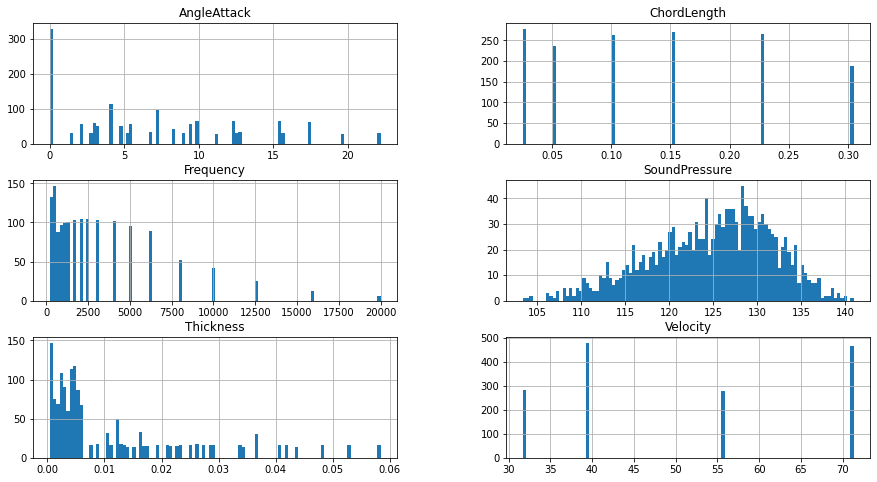

In [22]:
# Visualize histogram of dataset
dataset.hist(figsize= (15,8), bins= 100)
plt.show()

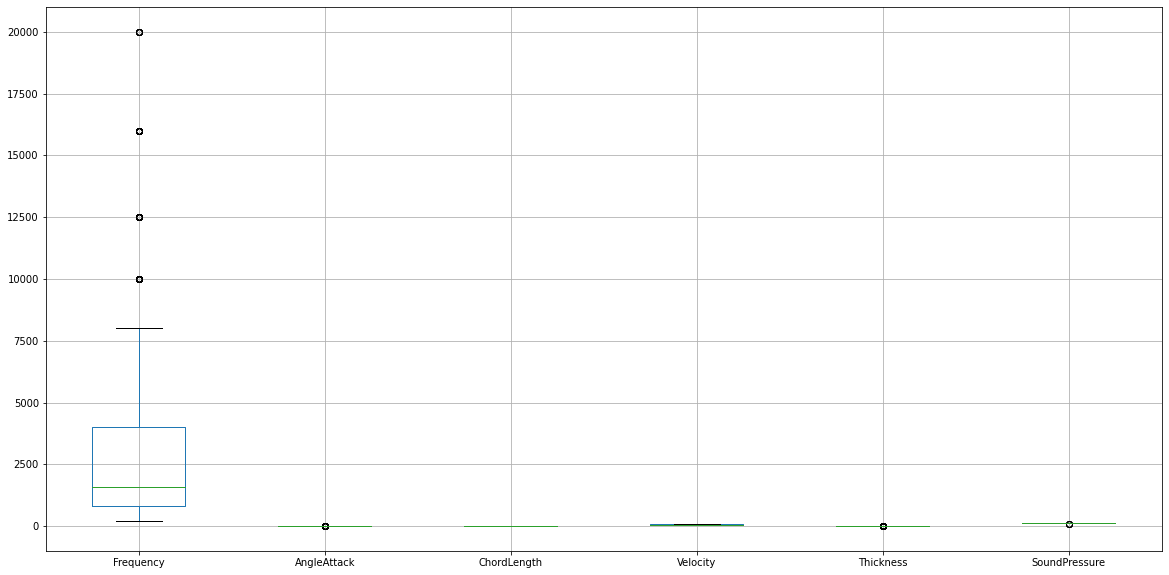

In [25]:
# Boxplot of dataframe
dataset.boxplot(figsize= (20,10) )
plt.show()

### Skewness Check

The skewness of Frequency column is: 2.1370843370561032
The kurtosis of Frequency column is: 5.708685076629566


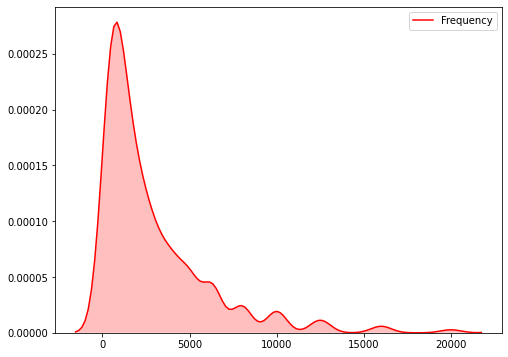

In [26]:
# Statistical analysis on Frequency column
print("The skewness of Frequency column is:", dataset['Frequency'].skew())
print("The kurtosis of Frequency column is:", dataset['Frequency'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['Frequency'], shade=True, color="r")
plt.show()

The skewness of AngleAttack column is: 0.6891644015246552
The kurtosis of AngleAttack column is: -0.4129507932946681


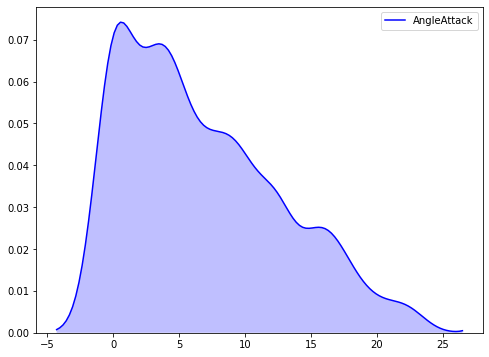

In [32]:
# Statistical analysis on AngleAttack column
print("The skewness of AngleAttack column is:", dataset['AngleAttack'].skew())
print("The kurtosis of AngleAttack column is:", dataset['AngleAttack'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['AngleAttack'], shade=True, color="b")
plt.show()

The skewness of ChordLength column is: 0.4574574796795428
The kurtosis of ChordLengthcolumn is: -1.037964096539102


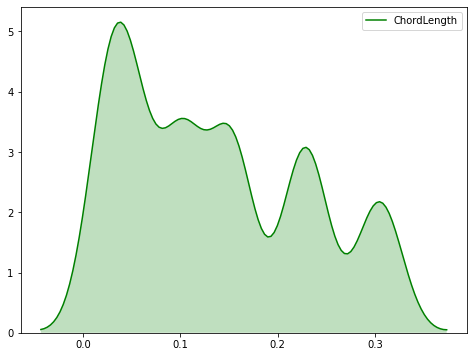

In [31]:
# Statistical analysis on ChordLength column
print("The skewness of ChordLength column is:", dataset['ChordLength'].skew())
print("The kurtosis of ChordLengthcolumn is:", dataset['ChordLength'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['ChordLength'], shade=True, color="g")
plt.show()

The skewness of Velocity column is: 0.23585241419124836
The kurtosis of Velocity column is: -1.5639512742591497


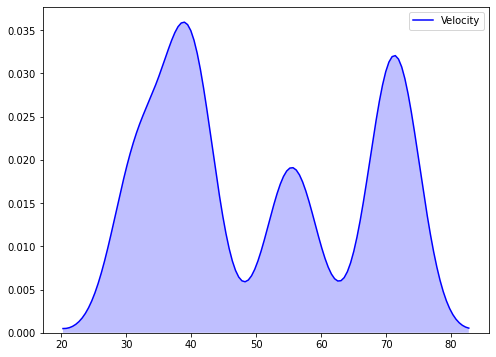

In [30]:
# Statistical analysis on Velocity column
print("The skewness of Velocity column is:", dataset['Velocity'].skew())
print("The kurtosis of Velocity column is:", dataset['Velocity'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['Velocity'], shade=True, color="b")
plt.show()

The skewness of Thickness column is: 1.702164556088956
The kurtosis of Thickness column is: 2.218903124436664


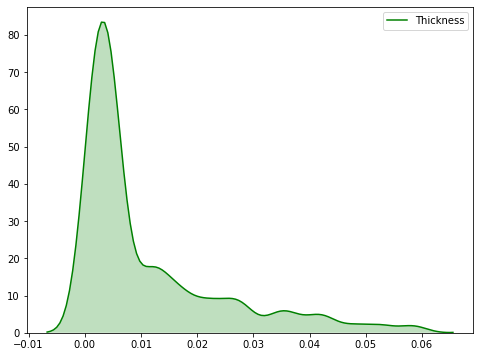

In [33]:
# Statistical analysis on Thickness column
print("The skewness of Thickness column is:", dataset['Thickness'].skew())
print("The kurtosis of Thickness column is:", dataset['Thickness'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['Thickness'], shade=True, color="g")
plt.show()

The skewness of SoundPressure column is: -0.41895218773468573
The kurtosis of SoundPressure column is: -0.31418730019313745


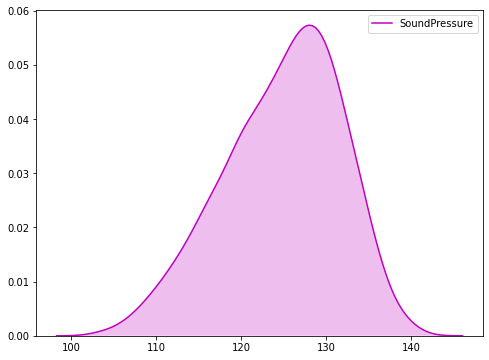

In [34]:
# Statistical analysis on SoundPressure column
print("The skewness of SoundPressure column is:", dataset['SoundPressure'].skew())
print("The kurtosis of SoundPressure column is:", dataset['SoundPressure'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['SoundPressure'], shade=True, color="m")
plt.show()